In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file Excel
df = pd.read_excel('heart_short.xlsx', sheet_name="data")
df


,t_index,c_index,target
0,145,233,1
1,130,250,1
2,130,204,1
3,130,254,0
4,140,203,0
5,130,256,0
6,140,294,1
7,120,263,1
8,172,199,1
9,150,168,1


In [107]:

# Tách dữ liệu đầu vào (X) và đầu ra (y)
X = df[['t_index','c_index']].values  # input features
y = df[['target']].values  # output target variable


In [108]:

# Chuyển đổi kiểu dữ liệu thành float
X = X.astype(float)
y = y.astype(float)


In [109]:

from sklearn.model_selection import train_test_split
# Chia dữ liệu thành tập huấn luyện (70%) và tập kiểm tra (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)


In [110]:

from sklearn.neighbors import KNeighborsClassifier
# Khởi tạo mô hình KNN với 5 hàng xóm gần nhất
knnModel = KNeighborsClassifier(n_neighbors=5)


In [111]:

# Huấn luyện mô hình với dữ liệu huấn luyện
knnModel.fit(X_train, y_train)


C:\Users\Star\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [112]:

# Dự đoán giá trị cho tập kiểm tra
y_test_predicted = knnModel.predict(X_test)
y_test_predicted


array([0., 0., 0., 0.])

In [113]:

# Đánh giá độ chính xác của mô hình trên tập kiểm tra
knnModel.score(X_test, y_test)


0.0

In [114]:

from sklearn.metrics import accuracy_score
# Tính toán độ chính xác
accuracy_score(y_test, y_test_predicted)


0.0

In [115]:

from sklearn.metrics import confusion_matrix
# Tính toán ma trận nhầm lẫn
cf_matrix = confusion_matrix(y_test, y_test_predicted)
cf_matrix


array([[0, 0],
       [4, 0]])

In [116]:

# Hàm tính toán precision, recall, và F1-score
def myscores(smat): 
    tp = smat[0][0]  # True Positives
    fp = smat[0][1]  # False Positives
    fn = smat[1][0]  # False Negatives
    tn = smat[1][1]  # True Negatives
    vprecision = tp / (tp + fp) if (tp + fp) > 0 else 0  # Precision
    vrecall = tp / (tp + fn) if (tp + fn) > 0 else 0      # Recall
    vf1 = 2 * (vprecision * vrecall) / (vprecision + vrecall) if (vprecision + vrecall) > 0 else 0  # F1-score

    return vprecision, vrecall, vf1

# In ra precision, recall, và F1-score
print("precision, recall, f1:", myscores(cf_matrix))


precision, recall, f1: (0, np.float64(0.0), 0)


In [117]:
import numpy as np
from sklearn.metrics import classification_report

# Kiểm tra phân phối lớp trong y_test
unique_classes, counts = np.unique(y_test, return_counts=True)
print("Phân phối lớp trong y_test:", dict(zip(unique_classes, counts)))

# Xuất báo cáo phân loại với zero_division
target_names = ['Không bệnh', 'Có bệnh']
print(classification_report(y_test, y_test_predicted, target_names=target_names, zero_division=0))


Phân phối lớp trong y_test: {np.float64(1.0): np.int64(4)}
              precision    recall  f1-score   support

  Không bệnh       0.00      0.00      0.00       0.0
     Có bệnh       0.00      0.00      0.00       4.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



In [118]:

# Kiểm tra phân phối lớp
unique, counts = np.unique(y_test, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Phân phối lớp trong y_test:", class_distribution)

# Nếu chỉ có một lớp, hãy chia lại dữ liệu
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=16)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Tiến hành huấn luyện và dự đoán như trước
knnModel.fit(X_train, y_train)
y_test_predicted = knnModel.predict(X_test)

# Tính xác suất dự đoán
y_pred_proba = knnModel.predict_proba(X_test)[:, 1]

# Tính toán đường cong ROC và diện tích dưới đường cong (AUC)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)


Phân phối lớp trong y_test: {np.float64(1.0): np.int64(4)}


C:\Users\Star\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


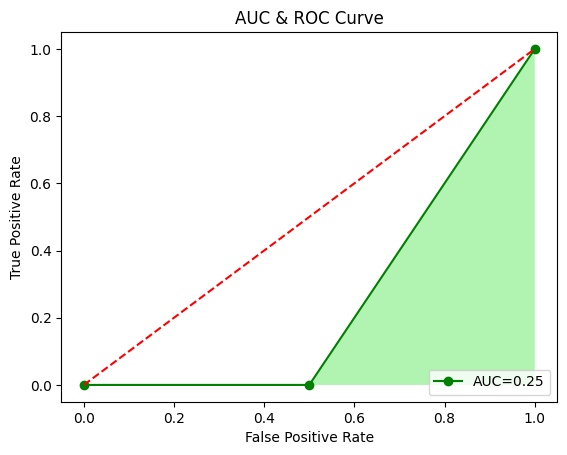

In [119]:

# Vẽ đồ thị AUC và đường cong ROC
plt.plot(fpr, tpr, 'go-', label="AUC=" + str(auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.title("AUC & ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.show()


In [120]:

import pickle
# Lưu mô hình đã huấn luyện vào file
pickle.dump(knnModel, open('model_KNN_Heart.sav', 'wb'))

# Tải mô hình từ file
loaded_model = pickle.load(open('model_KNN_Heart.sav', 'rb'))

# Nhập thông tin từ người dùng
v1 = float(input('t_index: '))
v2 = float(input('c_index: '))

# Dự đoán bệnh tim dựa trên thông tin người dùng
y_pred = loaded_model.predict([[v1, v2]])
print('Kết quả dự báo bệnh tim: ' + str(y_pred[0]))

# In ra kết quả dự đoán
if (y_pred[0] == 1):
    print("Bị bệnh tim")
else:
    print("Không bị bệnh")


Kết quả dự báo bệnh tim: 0.0
Không bị bệnh
